In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [4]:
Golddata = pd.read_csv(r'D:\MLProjects\gld_price_data.csv')

In [5]:
Golddata.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
Golddata.shape

(2290, 6)

In [7]:
Golddata.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
Golddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
Golddata.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
Golddata.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [15]:
numerical_data = Golddata.drop(columns=[Golddata.columns[0]])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

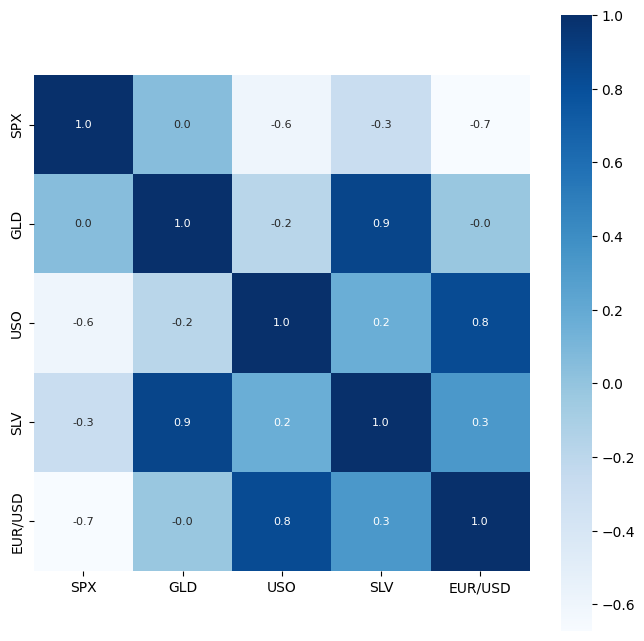

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [18]:
print(correlation_matrix['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


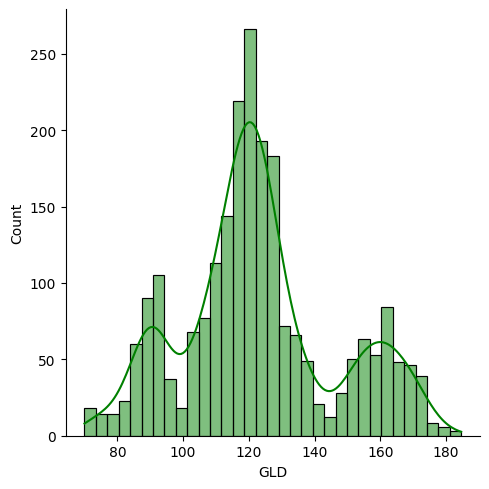

In [21]:
sns.displot(Golddata['GLD'],kde=True,color='g')

In [22]:
x = numerical_data.drop(columns=['GLD'])
y = numerical_data['GLD']

In [23]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [25]:
xtrain,xtest,ytain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [26]:
rg = RandomForestRegressor(n_estimators=100)

In [27]:
rg.fit(xtrain,ytain)

RandomForestRegressor()

In [28]:
prediction = rg.predict(xtest)

In [29]:
print(prediction)

[168.28759963  81.7721001  115.84120001 127.68460065 120.8266011
 154.84669797 150.34239896 126.14140066 117.53479864 125.84780102
 116.5912012  171.61780077 141.79239901 167.20579885 115.10659993
 117.82560051 138.05490311 169.92360083 159.68540274 158.32019963
 154.92300014 125.5279999  175.87709986 157.30860355 125.26260006
  93.91350002  77.4156002  120.28189995 119.12239979 167.4388994
  87.87720054 125.3564005   91.00280085 117.65460032 121.12719894
 136.37890051 115.57480117 115.2100008  148.27350004 107.33240114
 104.16850224  87.09139758 126.47920059 117.90759982 153.68429889
 119.36640018 108.56099996 108.23609849  93.00279995 127.08149818
  74.7319002  113.73569927 121.2021001  111.20059899 118.89299908
 120.66479952 159.33310005 167.11090072 146.88969679  85.93299862
  94.21380029  86.98359872  90.49509993 118.8869007  126.42970086
 127.56720046 168.88489971 122.33209912 117.46549899  98.67420027
 168.77560241 143.27659798 131.9108022  121.20440229 120.92429954
 119.8796003

In [30]:
error_score = metrics.r2_score(ytest,prediction)
print('R2 squared:', error_score)

R2 squared: 0.9895016131002704
